In [ ]:
import pandas as pd
from reliability.Probability_plotting import Weibull_probability_plot, Exponential_probability_plot, Lognormal_probability_plot, Normal_probability_plot
import matplotlib.pyplot as plt

# Set pandas display options to show more columns and wider output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

: 

In [25]:
df = pd.read_csv('masked_data_V1.csv')
df.head()

,series number,product type,model,repair operation number,previous repair operation number,time since previous repair,censored,age after repair,Component A,Component B,Component C,Component D,Component E,Component F,Component H,Component I,Component J,Component K
0,sn_000001,product A,V1E1,po_000001,MFG,5090,0,5090,0,0,0,1,1,0,0,0,0,0
1,sn_000001,product A,V1E2,po_000002,po_000001,5326,0,10366,0,0,0,0,1,0,0,0,0,0
2,sn_000001,product A,V1E2,po_000003,po_000002,3926,1,14242,0,0,0,0,0,0,0,0,0,0
3,sn_000002,product A,V1E1,po_000004,MFG,8686,0,8686,0,0,0,0,1,0,0,0,0,0
4,sn_000002,product A,V1E2,po_000005,po_000004,5690,1,14326,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

,time since previous repair,censored,age after repair,Component A,Component B,Component C,Component D,Component E,Component F,Component H,Component I,Component J,Component K
count,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000,13222.000000
mean,4729.004084,0.576388,7393.781879,0.026925,0.031765,0.025337,0.019362,0.306308,0.094010,0.007336,0.005597,0.004235,0.030782
std,2890.984761,0.494149,3926.235045,0.161870,0.175381,0.157151,0.137798,0.460977,0.291854,0.085340,0.074604,0.064944,0.172733
min,50.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2682.000000,0.000000,4498.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4446.000000,1.000000,6734.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6146.000000,1.000000,9910.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19090.000000,1.000000,28558.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 1000x600 with 0 Axes>

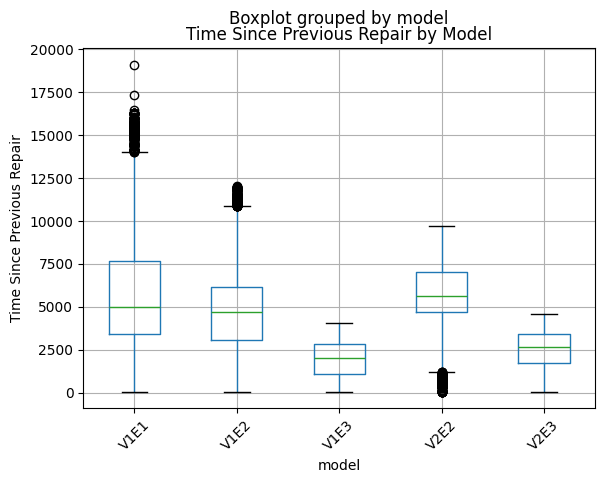

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
df.boxplot(column='time since previous repair', by='model')
plt.title('Time Since Previous Repair by Model')
plt.xticks(rotation=45)
plt.ylabel('Time Since Previous Repair')
plt.show()

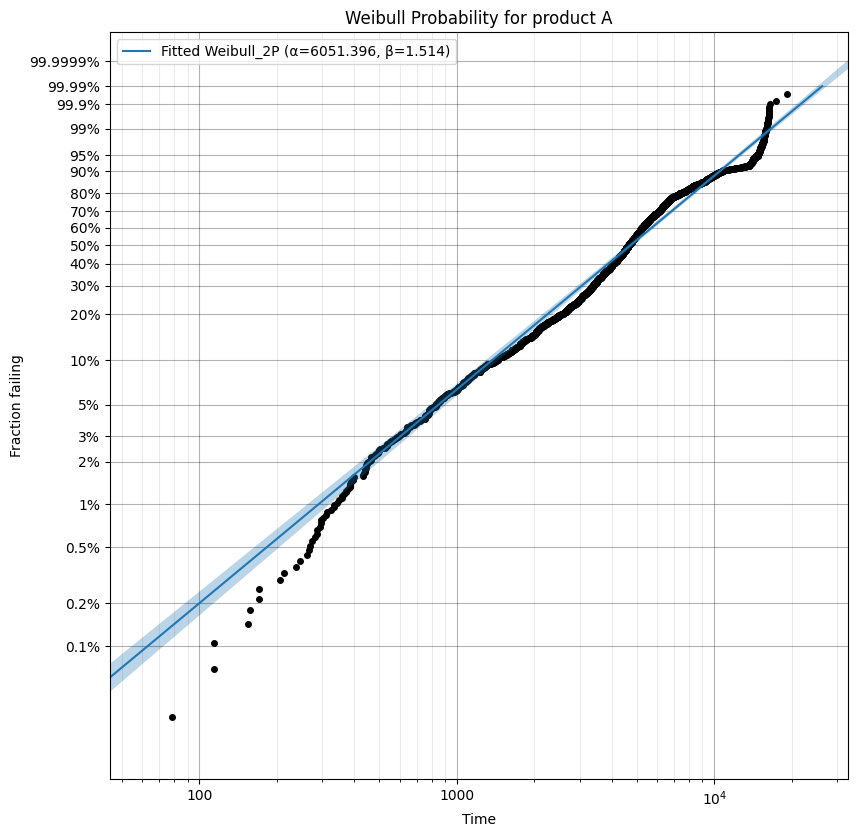

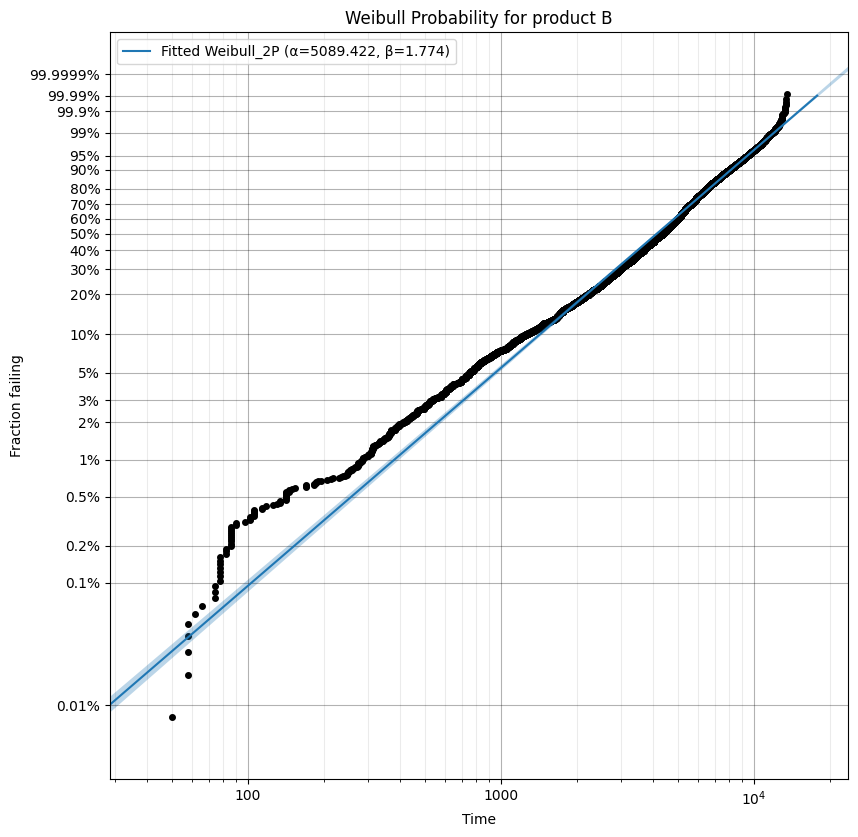

In [14]:
# Create Weibull probability plot for each product type
unique_products = df['product type'].unique()
for product in unique_products:
    mask = df['product type'] == product
    Weibull_probability_plot(
        failures=df[mask]['time since previous repair'].to_list(),
        right_censored=df[mask]['censored'].to_list(),
    )

    plt.title(f'Weibull Probability for {product}')
    plt.grid(True)
    plt.show()

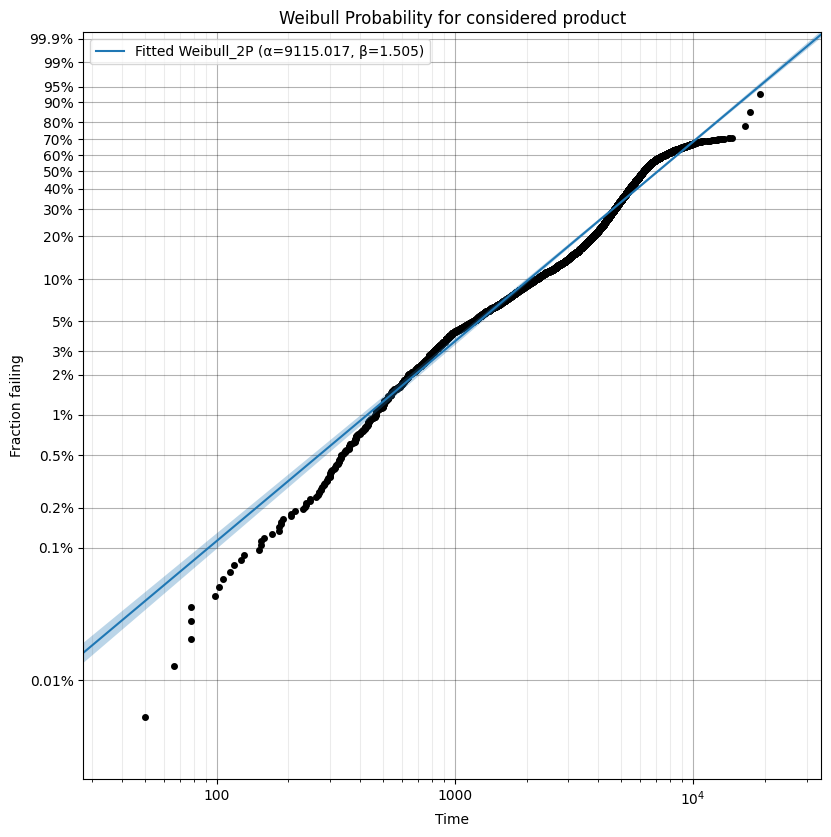

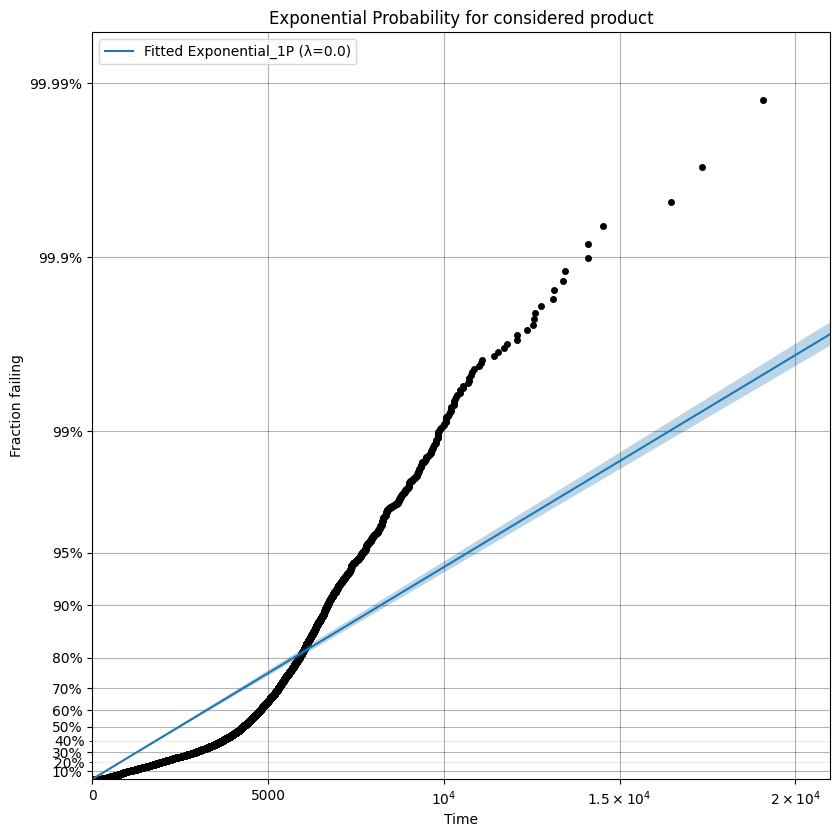

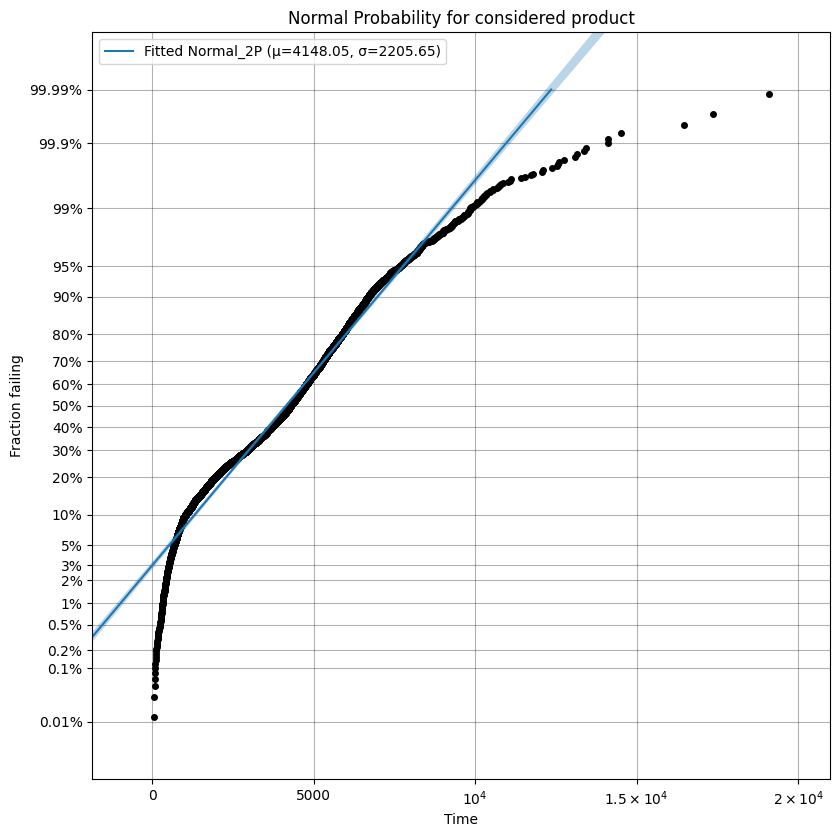

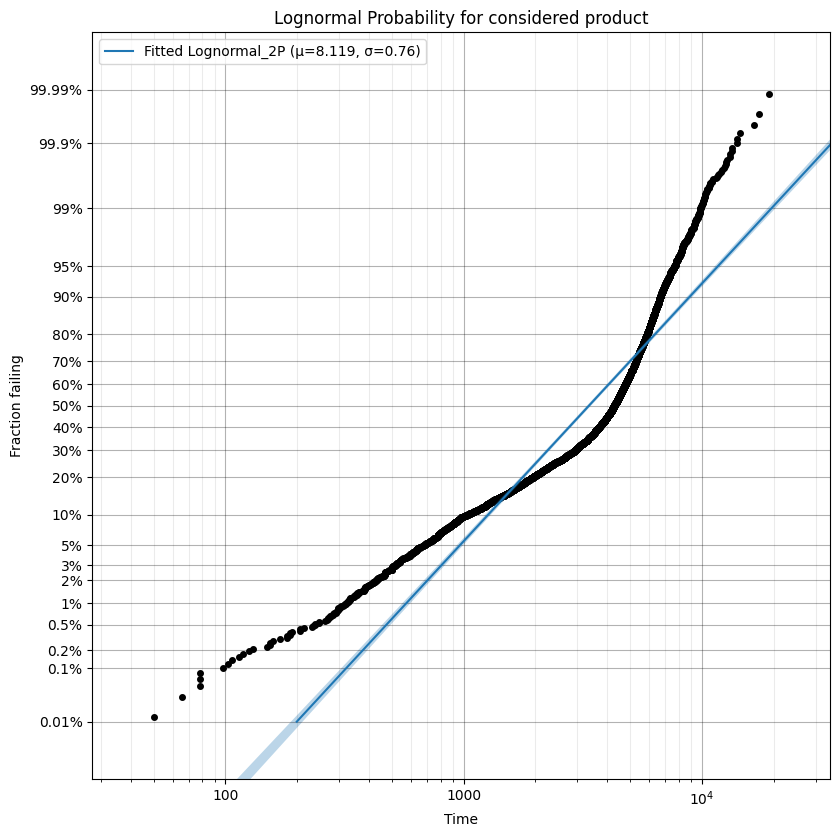

In [21]:
Weibull_probability_plot(
    failures=df.loc[df.censored==0, 'time since previous repair'].to_list(),
    right_censored=df.loc[df.censored==1, 'time since previous repair'].to_list(),
)

plt.title('Weibull Probability for considered product')
plt.grid(True)
plt.show()
# Exponential probability plot
Exponential_probability_plot(
    failures=df.loc[df.censored==0, 'time since previous repair'].to_list(),
)
plt.title('Exponential Probability for considered product')
plt.grid(True)
plt.show()

# Normal probability plot
Normal_probability_plot(
    failures=df.loc[df.censored==0, 'time since previous repair'].to_list(),
)
plt.title('Normal Probability for considered product')
plt.grid(True)
plt.show()

# Lognormal probability plot
Lognormal_probability_plot(
    failures=df.loc[df.censored==0, 'time since previous repair'].to_list(),
)
plt.title('Lognormal Probability for considered product')
plt.grid(True)
plt.show()

$Y$ : lifetime \
$T$ : $E1, E2, E3$ \
We want to estimate : $E[Y(t)]$ \
We can start by estimate $\hat{MTTF} = E[Y , E=E1]$ 

One option --> classical backdoor adjustement, considering age and product type as confounding effect (not the best though) \
Better --> propensity score stratification with $e(W) = P(E, \text{age}, \text{product\_type})$